# Konvergenz

In [2]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

Die Ordnung des Verfahrens kann durch die Betrachtung des Fehlers, hier zum bekannten exakten Wert, bestimmt werden. Dazu wird die Schrittweite kontinuierlich verkleinert. 

In [3]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung bei x=1
fp_exakt = 3*np.cos(3*0.85) + 2

In [4]:
x0 = 0.85

hs = []
fpfs = []
fpcs = []


h0 = 1
for i in range(20):
    h = h0 / 2**i

    f0 = fkt(x0)
    fnh = fkt(x0 - h)
    fph = fkt(x0 + h)

    fpf = (fph - f0) / h
    fpc = (fph - fnh) / (2*h)
    
    hs.append(h)
    fpfs.append(fpf)
    fpcs.append(fpc)

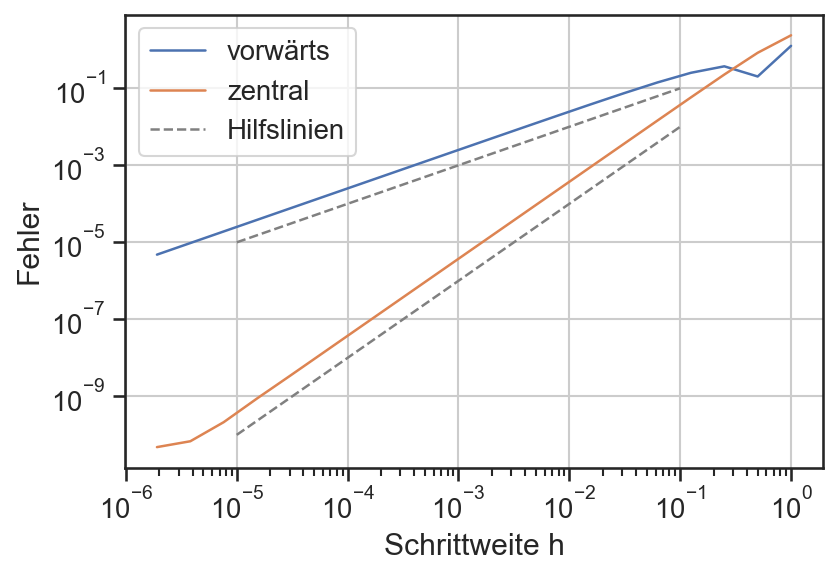

In [5]:
plt.plot(hs, np.abs(fpfs - fp_exakt), label='vorwärts')
plt.plot(hs, np.abs(fpcs - fp_exakt), label='zentral')

plt.plot([1e-5, 1e-1], [1e-5, 1e-1], '--', color='grey', label='Hilfslinien')
plt.plot([1e-5, 1e-1], [1e-10, 1e-2], '--', color='grey')

plt.xlabel('Schrittweite h')
plt.ylabel('Fehler')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid();